#### Problem 1 Solution

In [1]:
# Complete the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

def plot_skew(seq):
    GC_skew = [0]*len(seq)
    for idx in range(len(seq)):
        if seq[idx] == 'G':
            GC_skew[idx] = GC_skew[idx-1] + 1
        elif seq[idx] == 'C':
            GC_skew[idx] = GC_skew[idx-1] - 1
        else:
            GC_skew[idx] = GC_skew[idx-1]

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()
    ax.plot(GC_skew)
    
    ##################################################
    # Write your code here to solve the problem.
    #
    return GC_skew.index(max(GC_skew))

>NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome

The position of terC is: 1552388


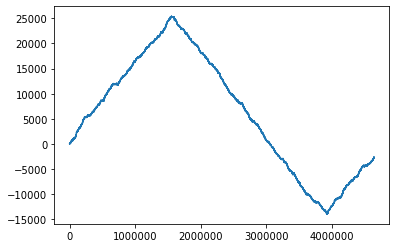

In [2]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

# E. coli gene sequence in fasta file.
filename = 'GCF_000005845.2_ASM584v2_genomic.fna' 

lines = open(filename,'r').readlines()
print(lines.pop(0))  # Removes the first comment line
ecoli_seq = ''.join([  line.strip() for line in lines  ])

terC = plot_skew(ecoli_seq)
print("The position of terC is:", terC)

---

#### Problem 2 Solution

In [3]:
# Change the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

import os
from Bio import SeqIO
from Bio import Entrez
Entrez.email = "your_email_address"  # Always tell NCBI who you are

# This function should retrieve a fasta record of the id.
# Hint: See W04_2.ipynb
def retrieve_FASTA_info(id):
    filename = id + ".gbk"

    print("Downloading FASTA information of", id, "...")
    net_handle = Entrez.efetch( db="nucleotide", id=id, rettype="gbwithparts", retmode="text")
    out_handle = open(filename, "w")
    out_handle.write(net_handle.read())
    out_handle.close()
    net_handle.close()
    print("Saved to:", filename)
    
    print("Parsing...")
    record = SeqIO.read(filename, "genbank")
    return record


In [4]:
#############################################################
# Answer

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

import os
from Bio import SeqIO
from Bio import Entrez
Entrez.email = "your_email_address"  # Always tell NCBI who you are

# This function should retrieve a fasta record of the id.
def retrieve_FASTA_info(id):
    filename = id + ".fna"

    print("Downloading FASTA information of", id, "...")
    net_handle = Entrez.efetch( db="nucleotide", id=id, rettype="fasta", retmode="text")
    out_handle = open(filename, "w")
    out_handle.write(net_handle.read())
    out_handle.close()
    net_handle.close()
    print("Saved to:", filename)
    
    print("Parsing...")
    record = SeqIO.read(filename, "fasta")
    return record


In [5]:
# The following code is provided for your test.
# You can modify it as you want, to test your function.

ids=[]
ids.append("NM_001316525.1") # ID of D. melanogaster Dop1R1 variant F (dopamine receptor)
ids.append("NM_206006.2")  # D.melanogaster Brain-specific homeobox (bsh)

for id in ids: 
    record = retrieve_FASTA_info(id)
    print('ID: ', record.id)
    print('    ', record.description)
    print('seq:', record.seq[:70])
    print('-----------------------------------------------------------------------------')
    

Saved to: NM_001316525.1.fna
Parsing...
ID:  NM_001316525.1
     NM_001316525.1 Drosophila melanogaster dopamine 1-like receptor 1, transcript variant F (Dop1R1), mRNA
seq: CAGTCGACGTTCAGCCTTCAGTTCGCACGGTTCGTCAAGCGGTGGCCCGCTGGAAAGATAGTGCCAGATA
-----------------------------------------------------------------------------
Saved to: NM_206006.2.fna
Parsing...
ID:  NM_206006.2
     NM_206006.2 Drosophila melanogaster brain-specific homeobox (bsh), transcript variant B, mRNA
seq: CGACCGTCAACGAGCAAACAACATAAGCGCGCGCGCGGTCCAAGGACACGTATATATCCCGGCTGGCTGG
-----------------------------------------------------------------------------


---

#### Problem 3 Solution

In [6]:
################################################################
# Run the cell of problem 1 to load the definition of plot_skew(seq) function.
# Do not copy & paste the function here.

################################################################
# Run the cell of problem 2 to load the definition of retrieve_FASTA_info(id) function.
# Do not copy & paste the function here.


# Complete the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

def HW4_prob3(id):
    # Write your code to implement step 6.
    record = retrieve_FASTA_info(id)
    terC = plot_skew( record.seq  )
    return terC


In [ ]:
# There are 4 different versions. Two of them: terC position at 814086, and the others: 814099

id = 'NC_000915.1'
#id = 'AE000511.1'
#id = 'NC_018939.1'
#id = 'CP003904.1'
terC = HW4_prob3(id)
print("The position of terC is:", terC)

Saved to: NC_000915.1.fna
Parsing...
The position of terC is: 814086


---

#### Problem 4 Solution

In [1]:
# This cell is given. The 'rettype' option of 'efetch()' has been taken care of.
# You should not need to modify this cell

import os
from Bio import SeqIO
from Bio import Entrez
Entrez.email = "your_email_address"  # Always tell NCBI who you are

# This function should retrieve a fasta record of the id.
# Hint: See W04_2.ipynb
def retrieve_GenBank_info(id):
    filename = id + ".gbk"

    print("Downloading FASTA information of", id, "...")
    # We are using "gbwithparts" option to retrieve the entire record, not summary
    net_handle = Entrez.efetch( db="nucleotide", id=id, rettype="gbwithparts", retmode="text")
    out_handle = open(filename, "w")
    out_handle.write(net_handle.read())
    out_handle.close()
    net_handle.close()
    print("Saved to:", filename)
    
    print("Parsing...")
    record = SeqIO.read(filename, "genbank")
    return record

In [2]:
# Complete the following function.

# DO NOT CHANGE THE FUNCTION NAME AND ARGUMENTS!!!

def print_10_CDS(id):

    count = 0   # You may want to use a counter variable to keep a record of how many CDS's you printed
    gen = retrieve_GenBank_info(id) # Step A: retrieve the GenBank record

    # Step B: Then you perform a loop
    for idx in range(len(gen.features)):

        # Step C: Check is the type of each feature is 'CDS'
        if gen.features[idx].type == 'CDS':
            # increase the "count" and print it
            # print the amino acid sequence after translation (use "print()" function)
            count += 1
            print(count)
            print( gen.features[idx].translate(gen.seq) )
            # Step D: Exit the for-loop when you printed 10 amino acid sequences
            if count == 10:
                break
                

In [3]:
# There are two versions of the complete genome of the 
# Helicobacter pylori 26695: 2014 version is CP003904.1 and 2020 version is NC_000915.1
# The result will give the same CDS sequences for the first few, but not after that.
# Either way, if you see the same result for the first 5 sequences, give full points.
#

print_10_CDS('NC_000915.1')
print_10_CDS('CP003904.1')

Saved to: NC_000915.1.gbk
Parsing...
1
MATRTQARGAVVELLYAFESGNEEIKKIASSMLEEKKIKNNQLAFALSLFNGVLEKINEIDALIEPHLKDWDFKRLGSMEKAILRLGAYEIGFTPTQNPIIINECIELGKLYAEPNTPKFLNAILDSLSKKLTQKPLN
2
MQIIEGKLQLQGNERVAILTSRFNHIITDRLQEGAMDCFKRHGGDEDLLDIVLVPGAYELPFILDKLLESEKYDGVCVLGAIIRGGTPHFDYVSAEATKGIAHAMLKYSMPVSFGVLTTDNIEQAIERAGSKAGNKGFEAMSTLIELLSLCQTLKG
3
MKTSKTKTPKSVLIAGPCVIESLENLRSIATKLQPLANNERLDFYFKASFDKANRTSLESYRGPGLEKGLEMLQTIKEEFGYKILTDVHESYQASVAAKVADILQIPAFLCRQTDLIVEVSQTNAIVNIKKGQFMNPKDMQYSVLKALKTRDKSIQSPTYETALKNGVWLCERGSSFGYGNLVVDMRSLKIMREFAPVIFDATHSVQMPGGANGKSSGDSSFAPILARAAAAVGIDGLFAETHVDPKNALSDGANMLKPDELEQLVTDMLKIQNLF
4
MKAFLGALEFQENEYEELKELYESLKTKQKPHTLFISCVDSRVVPNLITGTKPGELYVICNMGNVNPPKTSYKESLSTIASIEYAIAHVGVQNLIICGHSDCGACGSVHLIHDETTKAKTPYIANWIQFLEPVKEELKNHPQFSNHFAKRSWLTERLNARLQLNNLLSYDFIQEKASKNELKIFGWHYIIETGRIYNYNFESHFFEPIGETIKQRKSHENF
5
MQLCVALDLEKKEDNLSLLQELKGLDLWAKVGLRSFIRDGAVFLDEIRKIDENFKIFLDLKLYDIPYTMANAALECAKLDIDMLTVHLSSAKSALTALMQRLNALKKRPLIMGVSALTSFSEEEFLMVYNAPLKTQAIKLSAMGKESGIDGVVCSVFE

---
## **Check your code before you commit and push your homework**

### If there is any error in your code, including any practice code you wrote to test your answers, your homework will not be scored.

#### Here are steps you must take to make sure there is no error in your script.
1. You must first restart the kernel. It is in the menu "kernel->Restart Kernel". Or click the restart button.
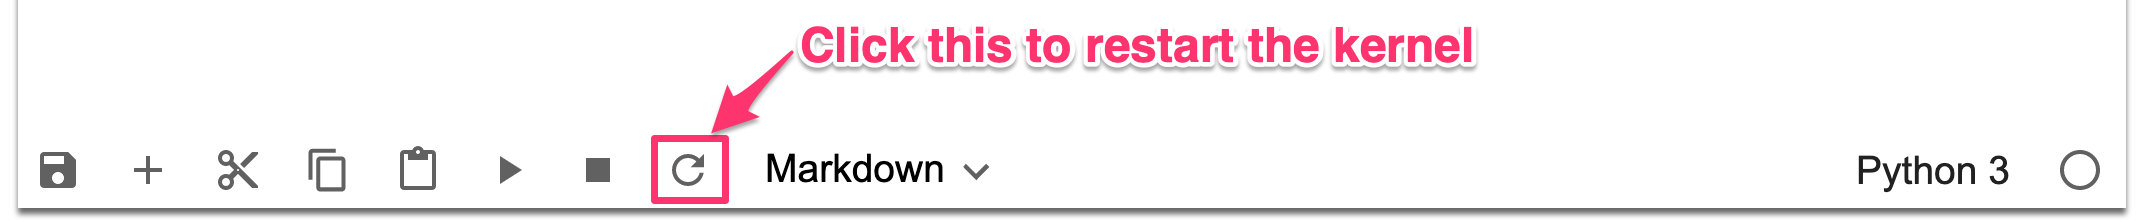
2. Run all cells. You can do this by clicking the menu "Run->Run all cells".
3. Fix any errors.
4. Repeate 1-3 until you don't see any errors.
5. **IMPORTNAT: Clear All Outputs (Right mouse click->Clear All Output)**
6. **IMPORTNAT: Save your file and change the filename to "HWn_Lastname_Firstname.ipynb"**
7. **Run the following cell and make sure you don't see any errors. This is the code that the TA or the instructor will use to generate testable code.**

In [ ]:
# If the name of the student is Abraham Lincoln, then the code should look
# like below.

!jupyter nbconvert --to script 'HW4_Lincoln_Abraham.ipynb'
import HW4_Lincoln_Abraham as hw  # Change this to your name
dir(hw)

# After running this code, you should see, at the bottom, the function names
# of your homework answers.

# If you see errors, please make sure the file names, module names are all
# properly set up. Then restart the kernel and try it again.


In [ ]:
id = 'NC_000915.1'
retrieve_FASTA_info(id)